# load data


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
table = np.load('/home/yunzheng/mock/color/data/newcatalogue/snapshot_92_new_withmag.npy')

In [6]:
table.shape

(26241654, 10)

In [7]:
vpeak = table[:,1]
zform = table[:,8]
mag = table[:,9]

# 判断完备区间

## 速度关系决定最小完备区间

In [6]:
(5040 / 542.16)**3 /(3072 / 600)**3

5.985484472730129

In [9]:
1.06 * 5.985484472730129

6.3446135410939375

In [10]:
5.985484472730129 **(1/3)

1.8156540504648073

In [11]:
1.8156540504648073 * 75

136.17405378486055

In [2]:
(5.42/1.06)**(1/3)

1.7227852326432738

In [124]:
1.7227852326432738 * 75

129.20889244824554

## 分mag bin 总共18个

In [9]:
print(np.max(mag))
print(np.min(mag))

-15.198372077661588
-23.45884600759151


In [132]:
mag_bin = np.arange(-23.5,-14.5,0.5)

In [133]:
mag_bin

array([-23.5, -23. , -22.5, -22. , -21.5, -21. , -20.5, -20. , -19.5,
       -19. , -18.5, -18. , -17.5, -17. , -16.5, -16. , -15.5, -15. ])

In [134]:
len(mag_bin)

18

In [135]:
inds = np.digitize(mag,mag_bin)

In [137]:
mag_sta = [[]for _ in range(18)]
vpeak_sta = [[]for _ in range(18)]
for n in range(len(mag)):
    mag_sta[inds[n]].append(mag[n])
    vpeak_sta[inds[n]].append(vpeak[n])

In [163]:
for i in range(18):
    print(len(mag_sta[i]))
#     print(len(vpeak_sta[i]))

0
92
2548
23027
99532
264943
514537
815602
1135557
1455717
1770810
2083956
2401580
2731099
3080059
3455300
3863273
2544022


In [437]:
mag_sta[6][:20]

[-20.501995812358036,
 -20.500867741581374,
 -20.503906656523828,
 -20.500620586638764,
 -20.51100674832265,
 -20.503434514526752,
 -20.504909712423114,
 -20.501250365642573,
 -20.51625873166503,
 -20.50961251266585,
 -20.5157404499356,
 -20.500910832790343,
 -20.512782978351545,
 -20.50513103895613,
 -20.514748970275708,
 -20.51839122681328,
 -20.52198383083999,
 -20.513799934611825,
 -20.504540234127013,
 -20.50015599607742]

### bin test

In [163]:
mag[ (-23.5 <= mag) & (mag < -23.0)].shape

(92,)

In [164]:
mag[ (-23.5 <= mag) * (mag < -23.0)].shape

(92,)

In [43]:
mag_list = [[]for _ in range(9)]
vpeak_list = [[]for _ in range(9)]
for i in range(len(mag_bin)-1):
    temp =  (mag_bin[i] <= mag) * (mag < mag_bin[i+1])
    print(mag_bin[i])
    mag_list[i] = mag[temp]
    vpeak_list[i] = vpeak[temp]

-23.5
-22.5
-21.5
-20.5
-19.5
-18.5
-17.5
-16.5
-15.5


In [45]:
vpeak_list[7].shape

(7318573,)

## **分vpeak bin**

### **分以10为间隔的bin，共有363个**

In [96]:
print(np.max(vpeak))

1835.6221923828125


In [86]:
vpeak_bin = np.arange(30,1841,5)

In [87]:
len(vpeak_bin)

363

In [100]:
vpeak_bin_mean = 0.5 * (vpeak_bin[1:] + vpeak_bin[:-1])

In [102]:
vpeak_bin_mean.shape

(362,)

### **用np.histogram统计**

In [174]:
vpeak_sta[9][:5]

[78.0467758178711,
 78.076904296875,
 78.15754699707031,
 78.1969985961914,
 78.20416259765625]

In [151]:
mag_16 = np.histogram(vpeak_sta[15],vpeak_bin)[0]
mag_17 = np.histogram(vpeak_sta[13],vpeak_bin)[0]
mag_18 = np.histogram(vpeak_sta[11],vpeak_bin)[0]
mag_19 = np.histogram(vpeak_sta[9],vpeak_bin)[0]
mag_20 = np.histogram(vpeak_sta[7],vpeak_bin)[0]
mag_21 = np.histogram(vpeak_sta[5],vpeak_bin)[0]
mag_22 = np.histogram(vpeak_sta[3],vpeak_bin)[0]
mag_23 = np.histogram(vpeak_sta[1],vpeak_bin)[0]

### 用plt.hist统计

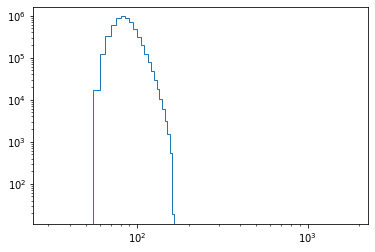

In [89]:
a = plt.hist(vpeak_sta[7],vpeak_bin,histtype='step',log = True)
plt.xscale('log')
# plt.yscale('log')

### 比较结果

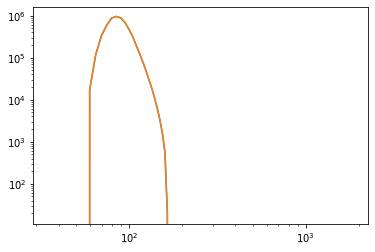

In [92]:
plt.plot(a[1][1:],a[0])
plt.plot(vpeak_bin[1:],mag_16)
plt.xscale('log')
plt.yscale('log')

### 判断速度完备样本

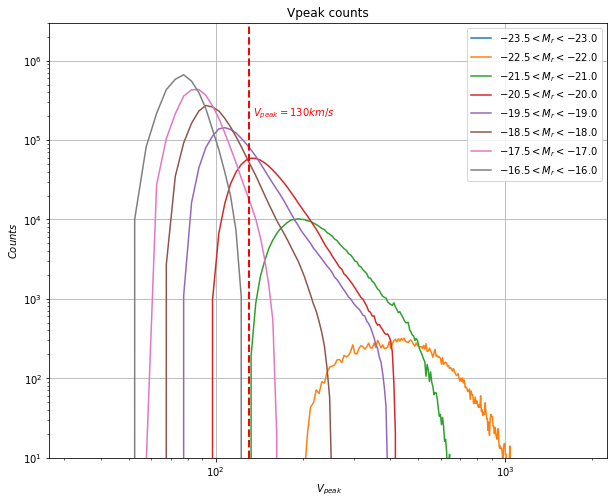

In [158]:
plt.figure(figsize=(10,8))
plt.plot(vpeak_bin_mean,mag_23,label = '$-23.5 < M_{r} < -23.0$')
plt.plot(vpeak_bin_mean,mag_22,label = '$-22.5 < M_{r} < -22.0$')
plt.plot(vpeak_bin_mean,mag_21,label = '$-21.5 < M_{r} < -21.0$')
plt.plot(vpeak_bin_mean,mag_20,label = '$-20.5 < M_{r} < -20.0$')
plt.plot(vpeak_bin_mean,mag_19,label = '$-19.5 < M_{r} < -19.0$')
plt.plot(vpeak_bin_mean,mag_18,label = '$-18.5 < M_{r} < -18.0$')
plt.plot(vpeak_bin_mean,mag_17,label = '$-17.5 < M_{r} < -17.0$')
plt.plot(vpeak_bin_mean,mag_16,label = '$-16.5 < M_{r} < -16.0$')

plt.axvline(x=130, c="r", ls="--", lw=2)
plt.text(x = 135,y = 200000,s = '$V_{peak} = 130 km / s$',color = 'red')

plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper right')
plt.title(r'Vpeak counts')
plt.xlabel(r' $V_{peak}$ ')
plt.ylabel(r'$Counts$')
plt.ylim(10,3*10**6)
plt.grid()
plt.savefig('/home/yunzheng/mock/color/picture/vpeak_magbin_counts.pdf',dpi = 100)


# 分红移 bin 计算zform cdf

## 对红移分bin

In [20]:
print(np.max(zform))
print(np.min(zform))

12.406872085246118
0.2182580231028184


In [126]:
ntemp = 0
for i in range(len(zform)):
    if zform[i] == 0.2182580231028184:
        ntemp = ntemp + 1

In [127]:
ntemp

128

### 分1000个红移 bin

In [65]:
arr_red = np.arange(101)
bin_red = 0 + 12.5 * arr_red / 100

In [66]:
red_bin_mean = 0.5 * (bin_red[1:] + bin_red[:-1])

In [67]:
bin_red[:20]

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
       1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125,
       2.25 , 2.375])

In [68]:
red_bin_mean

array([ 0.0625,  0.1875,  0.3125,  0.4375,  0.5625,  0.6875,  0.8125,
        0.9375,  1.0625,  1.1875,  1.3125,  1.4375,  1.5625,  1.6875,
        1.8125,  1.9375,  2.0625,  2.1875,  2.3125,  2.4375,  2.5625,
        2.6875,  2.8125,  2.9375,  3.0625,  3.1875,  3.3125,  3.4375,
        3.5625,  3.6875,  3.8125,  3.9375,  4.0625,  4.1875,  4.3125,
        4.4375,  4.5625,  4.6875,  4.8125,  4.9375,  5.0625,  5.1875,
        5.3125,  5.4375,  5.5625,  5.6875,  5.8125,  5.9375,  6.0625,
        6.1875,  6.3125,  6.4375,  6.5625,  6.6875,  6.8125,  6.9375,
        7.0625,  7.1875,  7.3125,  7.4375,  7.5625,  7.6875,  7.8125,
        7.9375,  8.0625,  8.1875,  8.3125,  8.4375,  8.5625,  8.6875,
        8.8125,  8.9375,  9.0625,  9.1875,  9.3125,  9.4375,  9.5625,
        9.6875,  9.8125,  9.9375, 10.0625, 10.1875, 10.3125, 10.4375,
       10.5625, 10.6875, 10.8125, 10.9375, 11.0625, 11.1875, 11.3125,
       11.4375, 11.5625, 11.6875, 11.8125, 11.9375, 12.0625, 12.1875,
       12.3125, 12.4

## 分bin 存vpeak，zform，mag

### 分new mag bin 组合存储三组数据 

> 分80个mag bin

> 每个mag bin 间隔为0.1

In [69]:
# mag_bin_new = np.arange(-235,-150,1)
mag_bin_new = np.array([-23.5,-23.0, -22.8, -22.7,
       -22.6, -22.5, -22.4, -22.3, -22.2, -22.1, -22. , -21.9, -21.8,
       -21.7, -21.6, -21.5, -21.4, -21.3, -21.2, -21.1, -21. , -20.9,
       -20.8, -20.7, -20.6, -20.5, -20.4, -20.3, -20.2, -20.1, -20. ,
       -19.9, -19.8, -19.7, -19.6, -19.5, -19.4, -19.3, -19.2, -19.1,
       -19. , -18.9, -18.8, -18.7, -18.6, -18.5, -18.4, -18.3, -18.2,
       -18.1, -18. , -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3,
       -17.2, -17.1, -17. , -16.9, -16.8, -16.7, -16.6, -16.5, -16.4,
       -16.3, -16.2, -16.1, -16. , -15.9, -15.8, -15.7, -15.6, -15.5,
       -15.4, -15.3, -15.2, -15.1])

In [465]:
# mag_bin_new = mag_bin_new / 10

In [167]:
mag_bin_new.shape

(80,)

In [71]:
inds = np.digitize(mag,mag_bin_new)

In [168]:
np.max(inds)

79

In [166]:
np.min(inds)

1

In [73]:
inds.shape

(26241654,)

In [170]:
mag[0]

-15.198807184159735

In [171]:
inds[0]

79

In [16]:
inds.shape


(26241654,)

In [74]:
# 尝试把subhalo信息都存成一行方便查找
total_bin = [[]for _ in range(80)]
for n in range(len(vpeak)):
    sub_info = np.array((vpeak[n],zform[n],mag[n]))
    total_bin[inds[n]].append(sub_info)

In [75]:
for i in range(80):
    print(mag_bin_new[i])
    print(len(total_bin[i]))

-23.5
0
-23.0
92
-22.8
324
-22.7
393
-22.6
687
-22.5
1144
-22.4
1826
-22.3
2805
-22.2
4153
-22.1
5954
-22.0
8289
-21.9
11221
-21.8
14828
-21.7
19158
-21.6
24231
-21.5
30094
-21.4
36739
-21.3
44133
-21.2
52289
-21.1
61149
-21.0
70633
-20.9
80745
-20.8
91397
-20.7
102481
-20.6
114015
-20.5
125899
-20.4
138018
-20.3
150422
-20.2
163009
-20.1
175668
-20.0
188485
-19.9
201364
-19.8
214205
-19.7
227122
-19.6
240031
-19.5
252835
-19.4
265680
-19.3
278483
-19.2
291157
-19.1
303866
-19.0
316531
-18.9
329067
-18.8
341656
-18.7
354217
-18.6
366669
-18.5
379201
-18.4
391733
-18.3
404189
-18.2
416756
-18.1
429359
-18.0
441919
-17.9
454628
-17.8
467409
-17.7
480185
-17.6
493145
-17.5
506213
-17.4
519315
-17.3
532635
-17.2
546099
-17.1
559632
-17.0
573418
-16.9
587381
-16.8
601449
-16.7
615801
-16.6
630364
-16.5
645064
-16.4
660079
-16.3
675337
-16.2
690765
-16.1
706538
-16.0
722581
-15.9
738830
-15.8
755450
-15.7
772373
-15.6
789531
-15.5
807089
-15.4
824980
-15.3
843137
-15.2
861724
-15.1
14181


In [76]:
mag_bin_new

array([-23.5, -23. , -22.8, -22.7, -22.6, -22.5, -22.4, -22.3, -22.2,
       -22.1, -22. , -21.9, -21.8, -21.7, -21.6, -21.5, -21.4, -21.3,
       -21.2, -21.1, -21. , -20.9, -20.8, -20.7, -20.6, -20.5, -20.4,
       -20.3, -20.2, -20.1, -20. , -19.9, -19.8, -19.7, -19.6, -19.5,
       -19.4, -19.3, -19.2, -19.1, -19. , -18.9, -18.8, -18.7, -18.6,
       -18.5, -18.4, -18.3, -18.2, -18.1, -18. , -17.9, -17.8, -17.7,
       -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17. , -16.9, -16.8,
       -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16. , -15.9,
       -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1])

In [77]:
np.array(total_bin[78])[:,1]

array([0.28906294, 0.25344051, 0.25344051, ..., 3.65005921, 5.23329269,
       2.50966001])

In [78]:
len(total_bin[79])

14181

### 判断$M_{r} \ < -20$才完备

1
2
3
4
5


Text(0, 0.5, '$C\\ D \\ F$')

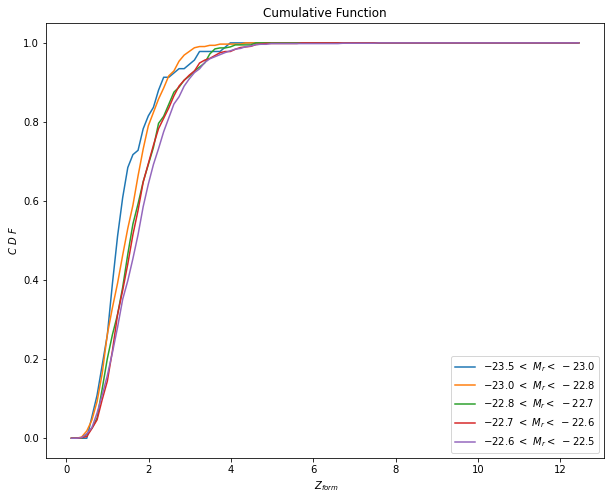

In [45]:
plt.figure(figsize=(10,8))
for i in range(1,6):
    print(i)
    info = np.array(total_bin[i])
    v_hist = np.histogram(info[:,1],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    plt.plot(bin_red[1:],cdf,label = '$%s \ <\ M_{r} <\ %s$'%(mag_bin_new[i-1],mag_bin_new[i]))
#     plt.plot(bin_red[1:],cdf,label = '$%s\ <\ vpeak\ < %s$'%(bin_0[i-1],bin_0[i]))
plt.legend()
plt.title('Cumulative Function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$C\ D \ F$')
# plt.savefig('/home/yunzheng/mock/color/picture/cumulative_function_magbintest.pdf',dpi = 100)

### 画图判断前三个bin数目过少

Text(0, 0.5, '$C\\ D \\ F$')

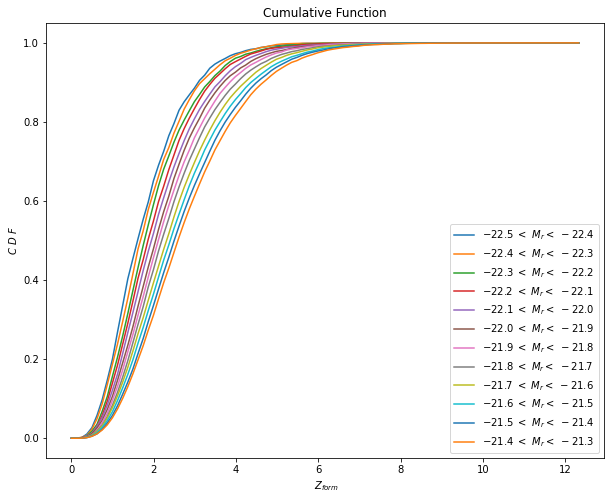

In [46]:
plt.figure(figsize=(10,8))
for i in range(6,18):
    info = np.array(total_bin[i])
    v_hist = np.histogram(info[:,1],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    plt.plot(bin_red[:-1],cdf,label = '$%s \ <\ M_{r} <\ %s$'%(mag_bin_new[i-1],mag_bin_new[i]))
#     plt.plot(bin_red[1:],cdf,label = '$%s\ <\ vpeak\ < %s$'%(bin_0[i-1],bin_0[i]))
plt.legend()
plt.title('Cumulative Function')

plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$C\ D \ F$')
# plt.savefig('/home/yunzheng/mock/color/picture/cumulative_function_magbintest.pdf',dpi = 100)

#### np.cumsum test

In [157]:
a = np.array([2,5,5,5,3,7,7,5,3,7,9,4])
bintemp = np.arange(1,11)
q = np.histogram(a,bintemp)[0]
b = np.cumsum(q/sum(q))

In [38]:
bintemp

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [158]:
q

array([0, 1, 2, 1, 4, 0, 3, 0, 1])

In [159]:
sum(q)

12

In [160]:
b

array([0.        , 0.08333333, 0.25      , 0.33333333, 0.66666667,
       0.66666667, 0.91666667, 0.91666667, 1.        ])

In [162]:
1/12

0.08333333333333333

### 合并前三个bin 统计cdf

In [278]:
a = np.array(total_bin[1])
b = np.array(total_bin[2])
c = np.array(total_bin[3])

In [288]:
temp1 = np.concatenate((a,b,c),axis=0)

In [291]:
temp1

array([[ 8.90007568e+02,  9.14921087e-01, -2.33151111e+01],
       [ 8.93339294e+02,  3.06248977e+00, -2.33990579e+01],
       [ 9.66710938e+02,  5.36025452e-01, -2.32827404e+01],
       ...,
       [ 1.54061768e+03,  1.14381427e+00, -2.29031427e+01],
       [ 1.54577637e+03,  1.01547319e+00, -2.28269311e+01],
       [ 1.60710791e+03,  1.04519590e+00, -2.28789654e+01]])

In [292]:
np.mean(temp1[:,2])

-22.884973461051054

In [303]:
mag_bin_new[0]

-23.5

In [388]:
len(total_bin)

35

In [297]:
np.mean(np.array(total_bin[3])[:,2])

-22.842814639169106

1
4
7
10
13
16
19
22
25
28
31
34


Text(0, 0.5, '$C\\ D \\ F$')

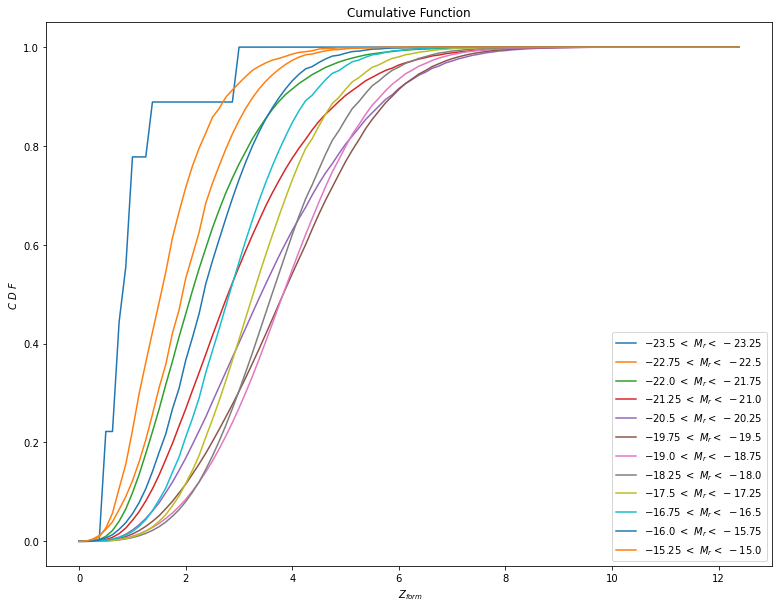

In [396]:
plt.figure(figsize=(13,10))
for i in range(1,len(total_bin),3):
    print(i)
    info = np.array(total_bin[i])
    v_hist = np.histogram(info[:,1],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    plt.plot(bin_red[:-1],cdf,label = '$%s \ <\ M_{r} <\ %s$'%(mag_bin_new[i-1],mag_bin_new[i]))

# v_hist1 = np.histogram(temp1[:,1],bin_red)[0]
# cdf1 = np.cumsum(v_hist1/sum(v_hist1))
# plt.plot(red_bin_mean,cdf1,'r--',label = '$%s\ <\ M_{r} <\ %s$'%(mag_bin_new[3],mag_bin_new[0]))


plt.legend()
plt.title('Cumulative Function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$C\ D \ F$')

In [397]:
cdf1.shape

(100,)

## 插值统计

### 不考虑第三个bin，直接做外插

In [311]:
red_bin_mean.shape

(51,)

In [312]:
total_bin[1]

[array([890.00756836,   0.91492109, -23.31511109]),
 array([893.33929443,   3.06248977, -23.39905791]),
 array([ 9.66710938e+02,  5.36025452e-01, -2.32827404e+01]),
 array([1009.91662598,    1.38091417,  -23.36264436]),
 array([ 1.22630017e+03,  1.06503089e+00, -2.32696509e+01]),
 array([ 1.35368921e+03,  8.15830121e-01, -2.32976779e+01]),
 array([ 1.43203699e+03,  5.55675632e-01, -2.34588460e+01]),
 array([ 1.49589539e+03,  1.12315016e+00, -2.32579944e+01]),
 array([ 1.58777856e+03,  8.29273181e-01, -2.33361184e+01])]

In [317]:
z_cdf = [[]for _ in range(51)]

for i in range(4,15):
    info = np.array(total_bin[i])
    mag_mean = np.mean(info[:,2])
    v_hist = np.histogram(info[:,1],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    
    for j in range(51):
        z_info = np.array((red_bin_mean[j],mag_mean,cdf[j]))
        z_cdf[j].append(z_info)
    
    



In [335]:
z_cdf[2]

[array([  0.5       , -22.59866367,   0.02675097]),
 array([ 5.00000000e-01, -2.23536254e+01,  2.21130221e-02]),
 array([ 5.00000000e-01, -2.21076601e+01,  1.37450802e-02]),
 array([ 5.00000000e-01, -2.18609334e+01,  9.90325066e-03]),
 array([ 5.00000000e-01, -2.16135689e+01,  7.11705146e-03]),
 array([ 5.00000000e-01, -2.13656639e+01,  4.97352800e-03]),
 array([ 5.00000000e-01, -2.11173460e+01,  3.30226063e-03]),
 array([ 5.00000000e-01, -2.08686929e+01,  2.70320194e-03]),
 array([ 5.00000000e-01, -2.06197528e+01,  2.32416655e-03]),
 array([ 5.00000000e-01, -2.03706027e+01,  1.91934932e-03]),
 array([ 5.00000000e-01, -2.01212842e+01,  1.70151683e-03])]

### 做外插

#### test interp1d / UnivariateSpline

In [348]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

In [342]:
a = np.array(([0,3,4.4,5,5,8,10.5,12]))
b = np.array(([-1,2,3.4,4,4,7,9.5,11]))
c = np.array(([-2,5,10,15]))

In [343]:
c

array([-2,  5, 10, 15])

In [344]:
f_temp = interp1d(a,b,fill_value = 'extrapolate')
d = f_temp(c)

In [355]:
f_temp1 = UnivariateSpline(a,b,s=8)
d1 = f_temp1(c)

In [352]:
d

array([-3.,  4.,  9., 14.])

In [356]:
d1

array([-3.,  4.,  9., 14.])

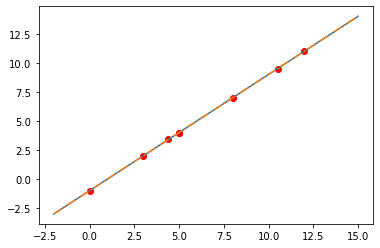

In [350]:
plt.plot(a,b,'ro')
plt.plot(c,d)
plt.plot(c,d1,'-.')

#### 插值

In [358]:
cdf_inter = [[]for _ in range(51)]
for i in range(51):
    info_temp = np.array(z_cdf[i])
    mag0 = info_temp[:,1]
    cdf0 = info_temp[:,2]
    
    f_in = interp1d(mag0,cdf0,fill_value = 'extrapolate')
    cdf_inter[i] = f_in(mag)

In [359]:
cdf_inter1 = [[]for _ in range(51)]
for i in range(51):
    info_temp = np.array(z_cdf[i])
    mag0 = info_temp[:,1]
    cdf0 = info_temp[:,2]
    
    f_in1 = UnivariateSpline(mag0,cdf0)
    cdf_inter1[i] = f_in1(mag)

In [360]:
temparray = np.array(cdf_inter)
temparray1 = np.array(cdf_inter1)

In [ ]:
np.where(mag==-20)

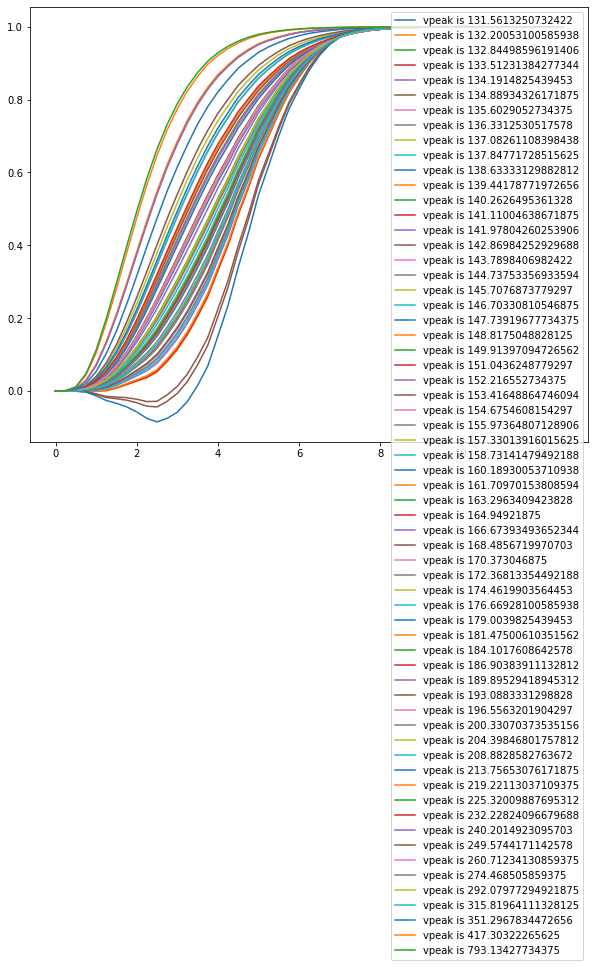

In [364]:
plt.figure(figsize=(10,8))
for i in range(23139211,26241654,50000):
    plt.plot(red_bin_mean,temparray[:,i],label = 'vpeak is %s'%vpeak[i])
plt.legend()

# 不用插值直接做

In [79]:
mag_bin_new.shape

(80,)

In [80]:
bin_red.shape

(101,)

In [81]:
bin_red

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
        2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,
        5.   ,  5.125,  5.25 ,  5.375,  5.5  ,  5.625,  5.75 ,  5.875,
        6.   ,  6.125,  6.25 ,  6.375,  6.5  ,  6.625,  6.75 ,  6.875,
        7.   ,  7.125,  7.25 ,  7.375,  7.5  ,  7.625,  7.75 ,  7.875,
        8.   ,  8.125,  8.25 ,  8.375,  8.5  ,  8.625,  8.75 ,  8.875,
        9.   ,  9.125,  9.25 ,  9.375,  9.5  ,  9.625,  9.75 ,  9.875,
       10.   , 10.125, 10.25 , 10.375, 10.5  , 10.625, 10.75 , 10.875,
       11.   , 11.125, 11.25 , 11.375, 11.5  , 11.625, 11.75 , 11.875,
       12.   , 12.125, 12.25 , 12.375, 12.5  ])

In [82]:
red_bin_mean

array([ 0.0625,  0.1875,  0.3125,  0.4375,  0.5625,  0.6875,  0.8125,
        0.9375,  1.0625,  1.1875,  1.3125,  1.4375,  1.5625,  1.6875,
        1.8125,  1.9375,  2.0625,  2.1875,  2.3125,  2.4375,  2.5625,
        2.6875,  2.8125,  2.9375,  3.0625,  3.1875,  3.3125,  3.4375,
        3.5625,  3.6875,  3.8125,  3.9375,  4.0625,  4.1875,  4.3125,
        4.4375,  4.5625,  4.6875,  4.8125,  4.9375,  5.0625,  5.1875,
        5.3125,  5.4375,  5.5625,  5.6875,  5.8125,  5.9375,  6.0625,
        6.1875,  6.3125,  6.4375,  6.5625,  6.6875,  6.8125,  6.9375,
        7.0625,  7.1875,  7.3125,  7.4375,  7.5625,  7.6875,  7.8125,
        7.9375,  8.0625,  8.1875,  8.3125,  8.4375,  8.5625,  8.6875,
        8.8125,  8.9375,  9.0625,  9.1875,  9.3125,  9.4375,  9.5625,
        9.6875,  9.8125,  9.9375, 10.0625, 10.1875, 10.3125, 10.4375,
       10.5625, 10.6875, 10.8125, 10.9375, 11.0625, 11.1875, 11.3125,
       11.4375, 11.5625, 11.6875, 11.8125, 11.9375, 12.0625, 12.1875,
       12.3125, 12.4

In [83]:
for i in range(80):
    print(len(total_bin[i]))

0
92
324
393
687
1144
1826
2805
4153
5954
8289
11221
14828
19158
24231
30094
36739
44133
52289
61149
70633
80745
91397
102481
114015
125899
138018
150422
163009
175668
188485
201364
214205
227122
240031
252835
265680
278483
291157
303866
316531
329067
341656
354217
366669
379201
391733
404189
416756
429359
441919
454628
467409
480185
493145
506213
519315
532635
546099
559632
573418
587381
601449
615801
630364
645064
660079
675337
690765
706538
722581
738830
755450
772373
789531
807089
824980
843137
861724
14181


## 统计每个mag bin内 zform cdf分布

In [84]:
temp = np.array(total_bin[1])

In [85]:
temp.shape

(92, 3)

In [86]:
total_cdf = [[]for _ in range(80)]
for i in range(1,80):
    info = np.array(total_bin[i])
    hist_temp = np.histogram(info[:,1],bin_red)[0]
    cdf = np.cumsum(hist_temp/sum(hist_temp))
    total_cdf[i].append(cdf)

In [87]:
bin_red

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
        2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,
        5.   ,  5.125,  5.25 ,  5.375,  5.5  ,  5.625,  5.75 ,  5.875,
        6.   ,  6.125,  6.25 ,  6.375,  6.5  ,  6.625,  6.75 ,  6.875,
        7.   ,  7.125,  7.25 ,  7.375,  7.5  ,  7.625,  7.75 ,  7.875,
        8.   ,  8.125,  8.25 ,  8.375,  8.5  ,  8.625,  8.75 ,  8.875,
        9.   ,  9.125,  9.25 ,  9.375,  9.5  ,  9.625,  9.75 ,  9.875,
       10.   , 10.125, 10.25 , 10.375, 10.5  , 10.625, 10.75 , 10.875,
       11.   , 11.125, 11.25 , 11.375, 11.5  , 11.625, 11.75 , 11.875,
       12.   , 12.125, 12.25 , 12.375, 12.5  ])

In [88]:
total_cdf[1][0]

array([0.        , 0.        , 0.        , 0.        , 0.05434783,
       0.10869565, 0.18478261, 0.26086957, 0.41304348, 0.51086957,
       0.60869565, 0.68478261, 0.7173913 , 0.72826087, 0.79347826,
       0.81521739, 0.83695652, 0.89130435, 0.91304348, 0.91304348,
       0.92391304, 0.93478261, 0.93478261, 0.94565217, 0.95652174,
       0.97826087, 0.97826087, 0.97826087, 0.97826087, 0.97826087,
       0.98913043, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

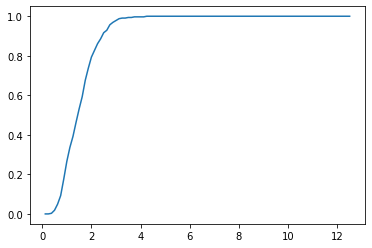

In [89]:
plt.plot(bin_red[1:],total_cdf[2][0],label = '$%s \ <\ M_{r} <\ %s$'%(mag_bin_new[i-1],mag_bin_new[i]))

In [90]:
cdf_zform = np.zeros(len(vpeak))
for n in range(len(vpeak)):
    cdf_zform[n] = np.interp(zform[n],red_bin_mean,total_cdf[inds[n]][0])

In [91]:
cdf_zform.shape

(26241654,)

In [92]:
cdf_zform[:3]

array([0.00251015, 0.00332794, 0.01398364])

In [251]:
cdf_zform[:3]

array([0.0006041 , 0.00097281, 0.0080339 ])

In [93]:
np.min(cdf_zform)

3.107900965555389e-05

In [119]:
np.max(cdf_zform)

1.0000000000000004

In [122]:
np.min(cdf_zform)

3.107900965555389e-05

In [120]:
np.where(cdf_zform == np.max(cdf_zform))

(array([18055870, 18983431, 20630146, 23899645, 24704963, 24915372,
        25005658, 25076073, 25586004, 25906733]),)

In [121]:
np.where(cdf_zform == np.min(cdf_zform))

(array([14420934]),)

In [128]:
mag[25005658]

-18.900993767178075

In [98]:
zform[18055870]

8.975233770164108

In [161]:
np.where(cdf_zform ==0.9999999005805945)

(array([24262711]),)

In [162]:
zform[24262711]

11.20435720665361

In [163]:
cdf_zform[24262711]

0.9999999005805945

In [165]:
mag[24262711]

-17.414351529778585

# 用反函数求color

In [172]:
from pynverse import inversefunc
from scipy.stats import norm


## Definition of color cdf

### blue galaxies fraction

In [111]:
def blue(M):
    if  M < -26.571428571428571:
        y = 0
        return y
    elif (M < -19.53846153846154):
        y = 0.46 + 0.07 * (M + 20)
        return y
    elif M < -17.1733389977005:
        y = 0.4 + 0.2 * (M + 20)
        return y
    else :
        y = 1 / (1 + np.exp(- (M + 20.5)))
        return y

### 解线性方程

In [112]:
from sympy import *

> 定义变量x 

In [104]:
x = Symbol('x')

> nsolve(方程式，x变量，近似估算值)

In [112]:
nsolve(0.2 * x + 4.4 - (1 / (1 + exp(- (x + 20.5)))),x,-17.1733389)

-17.1733389977005

In [109]:
0.4 + 0.2 * (-17.1733389977005 + 20)

0.9653322004598999

In [110]:
1 / (1 + np.exp(-(-17.1733389977005 + 20.5)))

0.9653322004599029

### 试用二分法

In [ ]:
for i in range():
    if 

### blue galaxies distribution

In [116]:
m_col = np.linspace(-28, -15,10000)
f_col = np.zeros(10000)
for i in range(10000):
    f_col[i] = blue(m_col[i])

Text(0, 0.5, '$f_{blue}$')

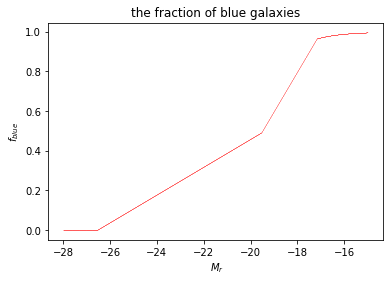

In [123]:
plt.plot(m_col,f_col,'ro',markersize = 0.01)
plt.title(r'the fraction of blue galaxies')
plt.xlabel(r' $M_r$ ')
plt.ylabel(r'$f_{blue}$')

## Gaussian componenets

### Two Gaussian function

In [129]:
def mu_blue(M,z):
    y = 0.62 - 0.11 * (M + 20) - 0.25 * (min(z,0.4) - 0.1)
    return y
def sigma_blue(M,z):
    y = 0.12 + 0.02 * (M + 20) + 0.2 * (z - 0.1)
    return y
def mu_red(M,z):
    y = 0.932 - 0.032 * (M + 20) - 0.18 * (min(z,0.4) - 0.1)
    return y
def sigma_red(M,z):
    y = 0.07 + 0.01 * (M + 20) + 0.5 * (z - 0.1) + 0.1 * (z - 0.1)**2
    return y

In [130]:
def cdf(col,M,z):
    y = blue(M) * norm.cdf(col,loc = mu_blue(M, z),scale = sigma_blue(M, z)) + (1 - blue(M)) * norm.cdf(col,loc = mu_red(M,z),scale = sigma_red(M,z))
    return y

In [131]:
def pdf(col,M,z):
    y = blue(M) * norm.pdf(col,loc = mu_blue(M, z),scale = sigma_blue(M, z)) + (1 - blue(M)) * norm.pdf(col,loc = mu_red(M,z),scale = sigma_red(M,z))
    return y

In [118]:
np.where(pdf(color,-21,0.2182580231028184) == 0)

(array([], dtype=int64),)

### inversefunc test


In [117]:
color = np.linspace(-1,2,10000)
distest = cdf(color,-23.5,0.2182580231028184)

In [166]:
invergau = inversefunc(cdf, args=(-17.414351529778585,z0),accuracy=5)

In [168]:
cdf(1.56557419,-22.5,0.2182580231028184)

0.9999999817374678

In [167]:
invergau(0.9999999005805945)

array(1.56557419)

### 反函数求颜色

> 代码在colorassignnew6

In [ ]:
z0 = 0.2182580231028184
newcolor = np.zeros(26241654)
# for i in range(2624):
for i in range(26241654):
    invergau = inversefunc(cdf,args=(mag[i],z0),accuracy = 6)
    newcolor[i] = invergau(cdf_zform[i])

In [169]:
newcolor[:10]

array([-0.71317044, -0.67961998, -0.51425548, -0.75416856, -0.65283881,
       -0.71300754, -0.75408498, -0.75272545, -0.52319654, -0.6529471 ])

In [137]:
mag[0]

-15.198807184159735

In [170]:
vpeak[0]

31.40896987915039

## load data

In [171]:
color = np.load('/home/yunzheng/mock/color/data/zcdf_new/color_mul2.npy')

In [172]:
color[:10]

array([-0.71317044, -0.67961998, -0.51425548, -0.75416856, -0.65283881,
       -0.71300754, -0.75408498, -0.75272545, -0.52319654, -0.6529471 ])

In [173]:
np.max(color)

5.236067898271622

In [174]:
np.min(color)

-4.236067960975427

In [175]:
len(mag)

26241654

In [182]:
mag_sta = [[]for _ in range(80)]
for n in range(len(mag)):
    mag_sta[inds[n]].append(mag[n])

In [178]:
color_sta = [[]for _ in range(80)]
for n in range(len(mag)):
    color_sta[inds[n]].append(color[n])

In [252]:
color_bin = np.arange(-4.25,5.25,0.025)

In [253]:
color_bin.shape

(380,)

In [237]:
mag_sta[21][-10:]


[-20.98806080319496,
 -20.975623754848844,
 -20.969017585682025,
 -20.970533937791746,
 -20.969058133870135,
 -20.99670617452705,
 -20.97595490884932,
 -20.991523564201405,
 -20.982312815063285,
 -20.998333451814908]

In [255]:
max(mag_22)

-21.900004691382538

In [256]:
min(mag_22)

-22.09999549086607

In [242]:
mag_bin_new[79]

-15.1

In [222]:
mag_bin_new

array([-23.5, -23. , -22.8, -22.7, -22.6, -22.5, -22.4, -22.3, -22.2,
       -22.1, -22. , -21.9, -21.8, -21.7, -21.6, -21.5, -21.4, -21.3,
       -21.2, -21.1, -21. , -20.9, -20.8, -20.7, -20.6, -20.5, -20.4,
       -20.3, -20.2, -20.1, -20. , -19.9, -19.8, -19.7, -19.6, -19.5,
       -19.4, -19.3, -19.2, -19.1, -19. , -18.9, -18.8, -18.7, -18.6,
       -18.5, -18.4, -18.3, -18.2, -18.1, -18. , -17.9, -17.8, -17.7,
       -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17. , -16.9, -16.8,
       -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16. , -15.9,
       -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1])

> 合成mag bin
> 构建新的color bin使其相应的mag分布满足条件

In [243]:
color_22 = color_sta[10] + color_sta[11]
color_21 = color_sta[20] + color_sta[21]
color_20 = color_sta[30] + color_sta[31]
color_19 = color_sta[40] + color_sta[41]
color_18 = color_sta[50] + color_sta[51]
color_17 = color_sta[60] + color_sta[61]
color_16 = color_sta[70] + color_sta[71]


In [257]:
color_bin.shape

(380,)

In [254]:
mag16 = np.histogram(color_16,color_bin,density = True)
mag17 = np.histogram(color_17,color_bin,density = True)
mag18 = np.histogram(color_18,color_bin,density = True)
mag19 = np.histogram(color_19,color_bin,density = True)
mag20 = np.histogram(color_20,color_bin,density = True)
mag21 = np.histogram(color_21,color_bin,density = True)
mag22 = np.histogram(color_22,color_bin,density = True)


### plt.hist test

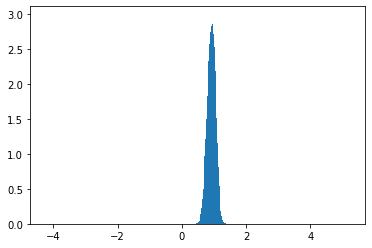

In [266]:
a = plt.hist(color_22,color_bin,density=True,label='hist')

In [274]:
a[0][200:210]

array([1.50343332, 1.82972792, 2.09406784, 2.32330012, 2.56698849,
       2.74046156, 2.83132841, 2.96349837, 2.86024059, 2.71774485])

In [271]:
a[1].shape

(380,)

In [273]:
mag22[0][200:210]

array([1.50343332, 1.82972792, 2.09406784, 2.32330012, 2.56698849,
       2.74046156, 2.83132841, 2.96349837, 2.86024059, 2.71774485])

# Theory comparison

In [291]:
pdf_theory = [[]for _ in range(8)]
for i in range(7):
    pdf_theory[i] = pdf(color_bin,-16-i,z = z0)

In [293]:
pdf_theory[7] = pdf(color_bin,-23,z = z0)

## 为了画图 重新定义color bin

In [275]:
color_bin_new = 0.5 * (color_bin[1:]+color_bin[:-1])

In [276]:
color_bin_new.shape

(379,)

[Text(0.0, 0, ''),
 Text(0.2, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, ''),
 Text(1.2000000000000002, 0, ''),
 Text(1.4000000000000001, 0, ''),
 Text(1.6, 0, ''),
 Text(1.8, 0, '')]

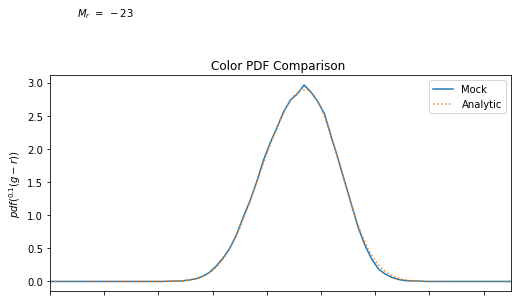

In [277]:
fig = plt.figure(figsize=(8,12))
frame1 = fig.add_axes((.1,.75,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag22[0],label = 'Mock')
# plt.hist(color_22,color_bin,density=True,label='hist')
plt.plot(color_bin,pdf_theory[6],label = 'Analytic',linestyle = ':')
plt.text(0.1,4,'$M_{r} \ = \ -23$',fontsize = 10)
plt.xlim(0,1.7)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

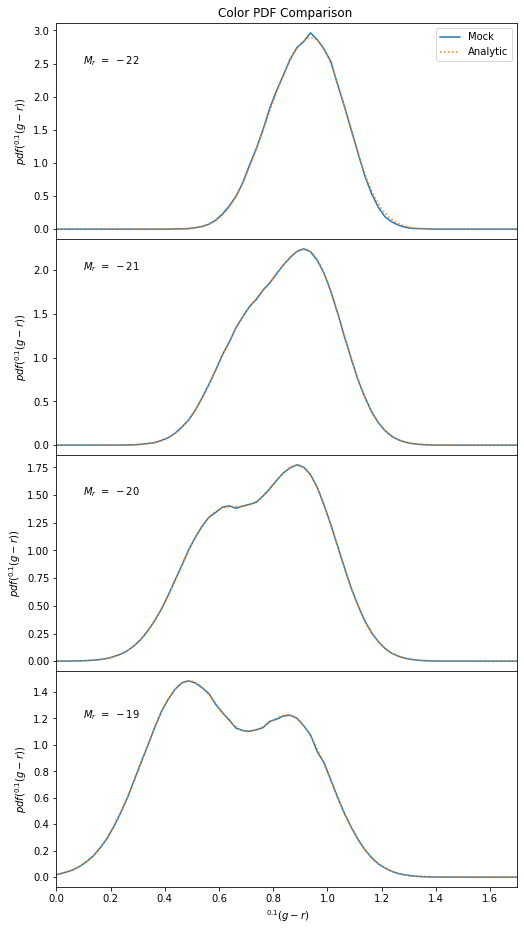

In [282]:
fig2 = plt.figure(figsize=(8,12))

frame1 = fig2.add_axes((.1,.75,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag22[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[6],label = 'Analytic',linestyle = ':')
plt.text(0.1,2.5,'$M_{r} \ = \ -22$',fontsize = 10)
plt.xlim(0,1.7)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

frame2 = fig2.add_axes((.1,.5,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag21[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[5],label = 'Analytic',linestyle = ':')
plt.text(0.1,2.,'$M_{r} \ = \ -21$',fontsize = 10)
plt.xlim(0,1.7)

plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame2.set_xticklabels([])

frame3 = fig2.add_axes((.1,.25,.8,.25))
ax = plt.gca()
plt.plot(color_bin_new,mag20[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[4],label = 'Analytic',linestyle = ':')
plt.text(0.1,1.5,'$M_{r} \ = \ -20$',fontsize = 10)
plt.xlim(0,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame3.set_xticklabels([])


frame4 = fig2.add_axes((.1,.0,.8,.25))
ax = plt.gca()
plt.plot(color_bin_new,mag19[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[3],label = 'Analytic',linestyle = ':')
plt.text(0.1,1.2,'$M_{r} \ = \ -19$',fontsize = 10)
plt.xlim(0,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')


plt.xlabel(r' $^{0.1}(g-r)$ ')

plt.savefig('/home/yunzheng/mock/color/picture/colorassign20_new_new.pdf',dpi = 100)

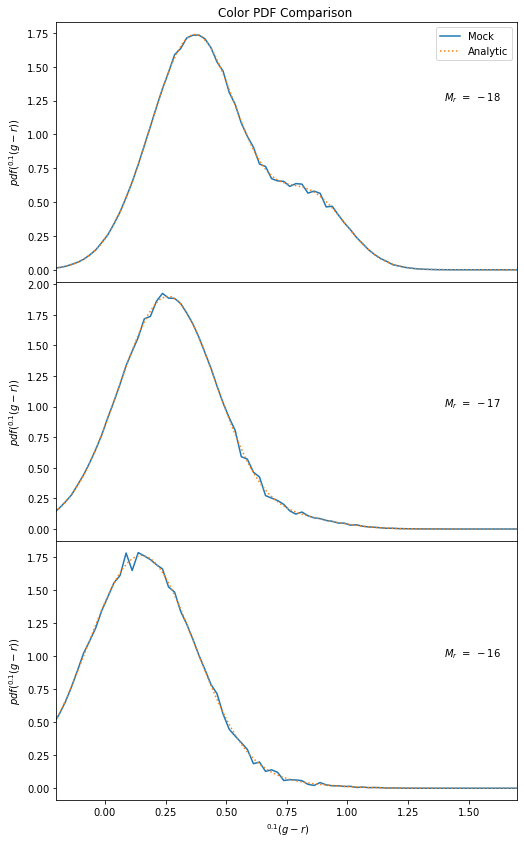

In [289]:
fig2 = plt.figure(figsize=(8,12))

frame1 = fig2.add_axes((.1,.65,.8,.3)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag18[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[2],label = 'Analytic',linestyle = ':')
plt.text(1.4,1.25,'$M_{r} \ = \ -18$',fontsize = 10)
plt.xlim(-0.2,1.7)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

frame2 = fig2.add_axes((.1,.35,.8,.3)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag17[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[1],label = 'Analytic',linestyle = ':')
plt.text(1.4,1.,'$M_{r} \ = \ -17$',fontsize = 10)
plt.xlim(-0.2,1.7)

plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame2.set_xticklabels([])

frame3 = fig2.add_axes((.1,.05,.8,.3))
ax = plt.gca()
plt.plot(color_bin_new,mag16[0],label = 'Mock')
plt.plot(color_bin,pdf_theory[0],label = 'Analytic',linestyle = ':')
plt.text(1.4,1,'$M_{r} \ = \ -16$',fontsize = 10)
plt.xlim(-0.2,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
plt.xlabel(r' $^{0.1}(g-r)$ ')

plt.savefig('/home/yunzheng/mock/color/picture/colorassign16_new_new.pdf',dpi = 100)

## 用新的 mag bin画图比较

In [294]:
mag_bin_new2 = np.arange(-23.5,-14.9,0.2)

In [1]:
mag_bin_new2.shape

NameError: name 'mag_bin_new2' is not defined

In [297]:
inds = np.digitize(mag,mag_bin_new2)

In [299]:
mag_sta2 = [[]for _ in range(43)]
color_sta2 = [[]for _ in range(43)]
for n in range(len(mag)):
    mag_sta2[inds[n]].append(mag[n])
    color_sta2[inds[n]].append(color[n])

In [315]:
pdf_test16 = pdf(color_bin,-16,z = 0.2182580231028184)
pdf_test17 = pdf(color_bin,-17,z = 0.2182580231028184)
pdf_test18 = pdf(color_bin,-18,z = 0.2182580231028184)
pdf_test19 = pdf(color_bin,-19,z = 0.2182580231028184)
pdf_test20 = pdf(color_bin,-20,z = 0.2182580231028184)
pdf_test21 = pdf(color_bin,-21,z = 0.2182580231028184)
pdf_test22 = pdf(color_bin,-22,z = 0.2182580231028184)
pdf_test23 = pdf(color_bin,-23,z = 0.2182580231028184)

In [301]:
print(np.min(color_sta[23]))
print(np.max(color_sta[23]))

0.11160923396234605
1.4698773318305118


In [302]:
color_bin.shape

(380,)

In [313]:
mag_sta2[38][-10:]

[-16.093323679390554,
 -16.095550532561752,
 -16.0981364146111,
 -16.0966675910415,
 -16.092633281435546,
 -16.095109849161364,
 -16.097156503250655,
 -16.094769148471705,
 -16.09595731714278,
 -16.096248254972586]

In [314]:
mag16 = np.histogram(color_sta2[38],color_bin,density = True)
mag17 = np.histogram(color_sta2[33],color_bin,density = True)
mag18 = np.histogram(color_sta2[28],color_bin,density = True)
mag19 = np.histogram(color_sta2[23],color_bin,density = True)
mag20 = np.histogram(color_sta2[18],color_bin,density = True)
mag21 = np.histogram(color_sta2[13],color_bin,density = True)
mag22 = np.histogram(color_sta2[8],color_bin,density = True)
mag23 = np.histogram(color_sta2[3],color_bin,density = True)

Text(0.5, 0, ' $^{0.1}(g-r)$ ')

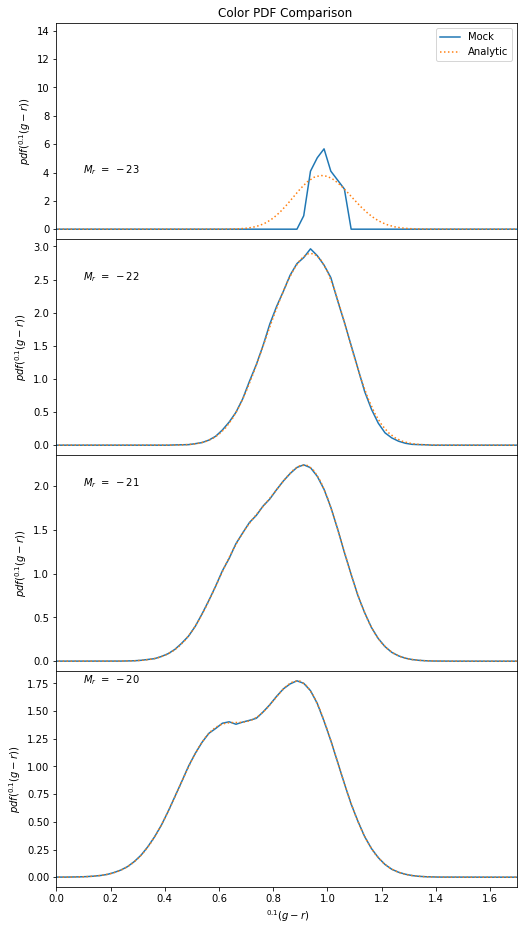

In [309]:
fig2 = plt.figure(figsize=(8,12))

frame1 = fig2.add_axes((.1,.75,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag23[0],label = 'Mock')
plt.plot(color_bin,pdf_test23,label = 'Analytic',linestyle = ':')
plt.text(0.1,4,'$M_{r} \ = \ -23$',fontsize = 10)
plt.xlim(0,1.7)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

frame2 = fig2.add_axes((.1,.5,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag22[0],label = 'Mock')
plt.plot(color_bin,pdf_test22,label = 'Analytic',linestyle = ':')
plt.text(0.1,2.5,'$M_{r} \ = \ -22$',fontsize = 10)
plt.xlim(0,1.7)

plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame2.set_xticklabels([])

frame3 = fig2.add_axes((.1,.25,.8,.25))
ax = plt.gca()
plt.plot(color_bin_new,mag21[0],label = 'Mock')
plt.plot(color_bin,pdf_test21,label = 'Analytic',linestyle = ':')
plt.text(0.1,2,'$M_{r} \ = \ -21$',fontsize = 10)
plt.xlim(0,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame3.set_xticklabels([])


frame4 = fig2.add_axes((.1,.0,.8,.25))
ax = plt.gca()
plt.plot(color_bin_new,mag20[0],label = 'Mock')
plt.plot(color_bin,pdf_test20,label = 'Analytic',linestyle = ':')
plt.text(0.1,1.75,'$M_{r} \ = \ -20$',fontsize = 10)
plt.xlim(0,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')


plt.xlabel(r' $^{0.1}(g-r)$ ')

# plt.savefig('/home/yunzheng/mock/color/picture/colorassign20_new.pdf',dpi = 100)

Text(0.5, 0, ' $^{0.1}(g-r)$ ')

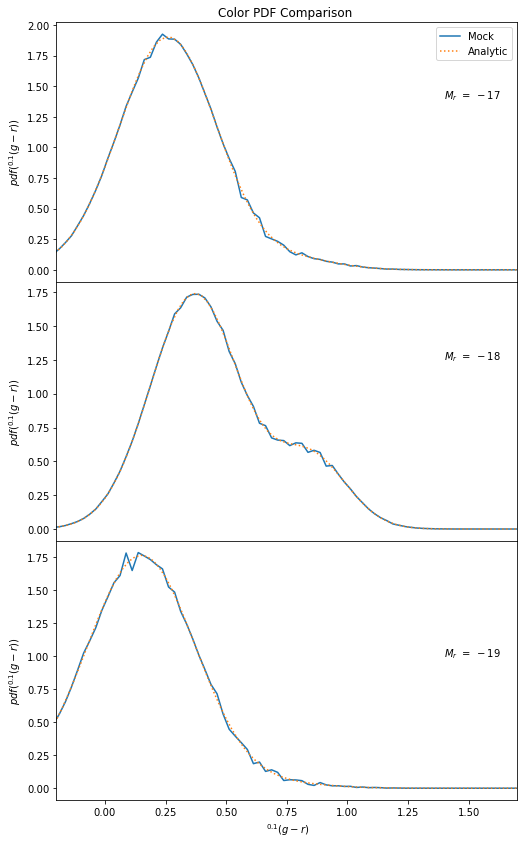

In [316]:
fig2 = plt.figure(figsize=(8,12))
frame1 = fig2.add_axes((.1,.65,.8,.3)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag17[0],label = 'Mock')
plt.plot(color_bin,pdf_test17,label = 'Analytic',linestyle = ':')
plt.text(1.4,1.4,'$M_{r} \ = \ -17$',fontsize = 10)
plt.xlim(-0.2,1.7)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

frame2 = fig2.add_axes((.1,.35,.8,.3))
ax = plt.gca()

plt.plot(color_bin_new,mag18[0],label = 'Mock')
plt.plot(color_bin,pdf_test18,label = 'Analytic',linestyle = ':')
plt.text(1.4,1.25,'$M_{r} \ = \ -18$',fontsize = 10)
plt.xlim(-0.2,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame2.set_xticklabels([])


frame3 = fig2.add_axes((.1,.05,.8,.3))
ax = plt.gca()
plt.plot(color_bin_new,mag16[0],label = 'Mock')
plt.plot(color_bin,pdf_test16,label = 'Analytic',linestyle = ':')
plt.text(1.4,1,'$M_{r} \ = \ -19$',fontsize = 10)
plt.xlim(-0.2,1.7)
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
plt.xlabel(r' $^{0.1}(g-r)$ ')

# plt.savefig('/home/yunzheng/mock/color/picture/colorassign17_new.pdf',dpi = 100)

In [1]:
fig = plt.figure(figsize=(8,12))
frame1 = fig.add_axes((.1,.75,.8,.25)) #前两个参数表示起点的位置坐标，后两个参数表示长宽
ax = plt.gca()
plt.plot(color_bin_new,mag23[0],label = 'Mock')
# plt.hist(color_22,color_bin,density=True,label='hist')
plt.plot(color_bin,pdf_test23,label = 'Analytic',linestyle = ':')
plt.text(0.1,4,'$M_{r} \ = \ -23$',fontsize = 10)
plt.xlim(0,1.7)
plt.ylim(0,8)
plt.legend()
plt.title(r'Color PDF Comparison ')
plt.ylabel(r'$pdf(^{0.1}(g-r))$')
frame1.set_xticklabels([])

NameError: name 'plt' is not defined

# download new catalogue with color

In [152]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [136]:
table = np.load('/home/yunzheng/mock/color/data/newcatalogue/snapshot_92_new_withcolor.npz')

In [137]:
table['subid'].shape

(26241654,)

In [138]:
table.files

['subid',
 'vpeak',
 'posx',
 'posy',
 'posz',
 'vx',
 'vy',
 'vz',
 'zform',
 'mag',
 'color']

In [139]:
table['posx']

array([184555.09375 , 468454.90625 , 421268.      , ..., 106277.625   ,
        81297.765625, 345925.40625 ])

In [140]:
table['posy']

array([352930.53125  , 264398.3125   , 594402.5      , ...,
        73429.0078125, 282002.375    , 576204.25     ])

In [141]:
mag =table['mag']
color = table['color']

In [142]:
color_cut = 0.21 - 0.03 * mag

In [143]:
red = color > color_cut
blue = color<= color_cut

In [144]:
blue.shape

(26241654,)

In [145]:
red_mag = mag[red]
blue_mag = mag[blue]

In [146]:
red_mag.shape

(3477946,)

In [147]:
blue_mag.shape

(22763708,)

In [148]:

m = -19
print('The Mag bin is between %s and %s' % (m-1,m))

temp = (mag < m) & (mag > m-1)

The Mag bin is between -20 and -19


In [149]:
mag[temp].shape

(2591274,)

In [150]:
temp = (mag<-17.5)&(mag>-23)
magbin = mag[temp]
colorbin = color[temp]

In [154]:
np.min(color)

-4.236067960975427

In [155]:
np.max(color)

5.236067898271622

(-5.0, 5.5)

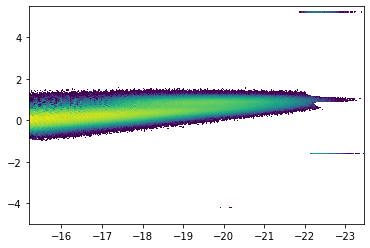

In [156]:
plt.hist2d(mag,color,bins = 1000,norm = mpl.colors.LogNorm())
plt.gca().invert_xaxis()
# plt.xlim(-17.5,-23)
plt.ylim(-5,5.5)

/home/yunzheng/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Unknown infodict keyword: Comment


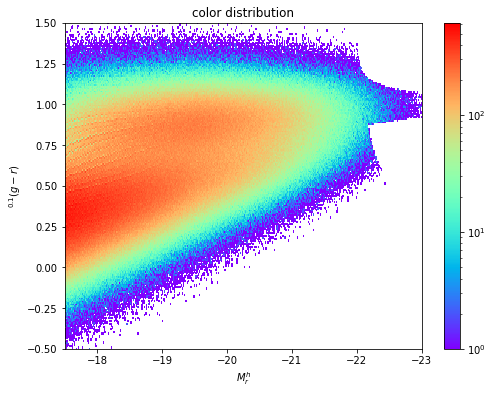

In [80]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

counts,xbins,ybins,image = plt.hist2d(magbin,colorbin,bins = 1000,norm = mpl.colors.LogNorm(),cmap = plt.cm.rainbow)
# plt.contour(counts.transpose(),extent=[-23,-17.5,-0.5,1.5],linewidths=0.1)

plt.gca().invert_xaxis()

plt.xlim(-17.5,-23)
plt.ylim(-0.5,1.5)
plt.colorbar()
# ax.set_aspect(np.diff(plt.get_xlim())/np.diff(plt.get_ylim()))
# ax.set_aspect('equal')

plt.xlabel('$M_{r}^{h}$')
plt.ylabel('$^{0.1}(g-r)$')
plt.title('color distribution')
plt.savefig('/home/yunzheng/mock/color/picture/color_distribution.pdf',dpi = 100,metadata = {'Comment':"color distribution to mag"})

In [72]:
np.diff?

Signature: np.diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)
Docstring:
Calculate the n-th discrete difference along the given axis.

The first difference is given by ``out[i] = a[i+1] - a[i]`` along
the given axis, higher differences are calculated by using `diff`
recursively.

Parameters
----------
a : array_like
    Input array
n : int, optional
    The number of times values are differenced. If zero, the input
    is returned as-is.
axis : int, optional
    The axis along which the difference is taken, default is the
    last axis.
prepend, append : array_like, optional
    Values to prepend or append to `a` along axis prior to
    performing the difference.  Scalar values are expanded to
    arrays with length 1 in the direction of axis and the shape
    of the input array in along all other axes.  Otherwise the
    dimension and shape must match `a` except along axis.

    .. versionadded:: 1.16.0

Returns
-------
diff : ndarray
    The n-th differences. The shape o

In [36]:
xbins

array([-23.45884601, -23.45058553, -23.44232506, ..., -15.21489303,
       -15.20663255, -15.19837208])

In [ ]:
ma